In [1]:
#cargamos librearias
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops, perimeter
from math import cos, sin, pi

(512, 512, 3)


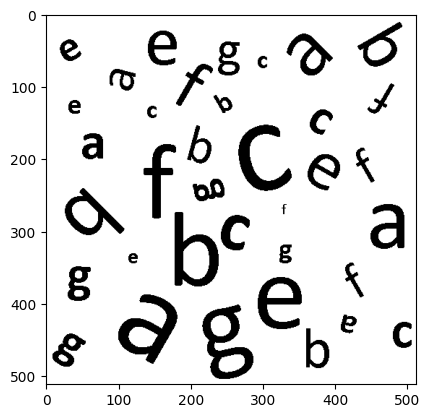

In [2]:
#cargamaos la imagen
img = cv2.imread("sopa_letras.png")
print(img.shape) 

plt.imshow(img)
plt.show()

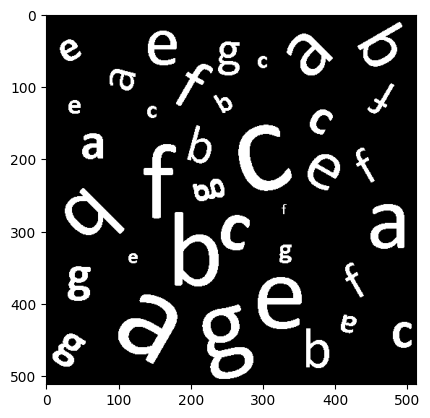

In [3]:
#imagen binaria
ret, bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bw, cmap= "gray")
plt.show()

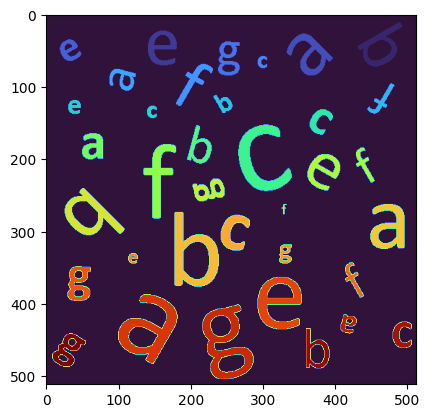

In [4]:
#se 
bw_label = label(bw[:,:,0])

plt.imshow(bw_label, cmap = "turbo")
plt.show()

In [5]:
#se separa por regiones
sts = regionprops(label_image = bw_label)

In [6]:
#listas para guardar la informacion
centrosx = []
centrosy = []

momentos = []
perimetros = []
rs = []
orientaciones = []

#ciclo for por cada region de la imagen, para calcular momentos, centro, perimetro, redondez y orientacion
for region in sts:

    centro = region.centroid

    momento_region = region.moments_hu[0:4]
    perimetro_region = perimeter(region.image, neighbourhood=8)
    r_region = ((4 * pi * region.area) / (perimetro_region * perimetro_region))
    orientacion_region = region.orientation

    #print("4 Primeros momentos de Hu: ", momentos)
    #print("Perimetro: ", perimetro)
    #print("Redondez: ", r)
    #print("Angulo de orientacion: ", orientacion)


    #plt.imshow(region.image, cmap='gray')
    #plt.scatter(centro[1],centro[0], c = "red", marker = "*", s=50) #con esto mostramos el punto del centro de masa
    #plt.show()

    centrosx.append(centro[1])
    centrosy.append(centro[0])

    momentos.append(momento_region)
    perimetros.append(perimetro_region)
    rs.append(r_region)
    orientaciones.append(orientacion_region)

In [ ]:
tabla = []
tabla.append(momentos)
tabla.append(perimetros)
tabla.append(r_region)
tabla.append(orientaciones)

formato = "{:>18}" * 4
print(formato.format("Momentos de Hu", "Perimetro", "Redondez", "Angulo"))

for v in tabla:
    momentos, perimetros, rs, orientaciones = v
    print (formato.format(momentos, perimetros, rs, orientaciones))

In [23]:
formato = "{:>18}" * 4
print(formato.format("Momentos de Hu", "Perimetro", "Redondez", "Angulo"))
for mome, row in zip(momentos, tabla):
    print(formato.format(mome, *row))

    Momentos de Hu         Perimetro          Redondez            Angulo


TypeError: unsupported format string passed to numpy.ndarray.__format__

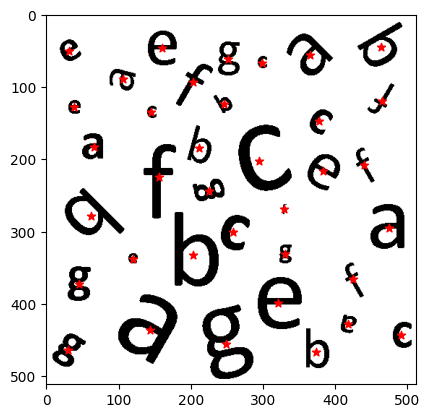

In [ ]:
plt.imshow(img, cmap='gray')
plt.scatter(centrosx,centrosy, c = "red", marker = "*") #con esto mostramos el punto del centro de masa
plt.show()